# 궤도 등급 분류

In [ ]:
pip install mglearn

     |████████████████████████████████| 542kB 8.5MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=bfcdb6907b379013a7ff1ce4e43a457abddbef6a5e656fe332307bd32ff686be
  Stored in directory: /root/.cache/pip/wheels/eb/a6/ea/a6a3716233fa62fc561259b5cb1e28f79e9ff3592c0adac5f0
Successfully built mglearn


In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#전처리
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import PolynomialFeatures

# 매개변수 그리드
from sklearn.model_selection import GridSearchCV

# 특성 선택
from sklearn.feature_selection import SelectFromModel



# 성능 평가
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer

f1_scorer = make_scorer(f1_score, pos_label="Y")

#overSampling
from imblearn.over_sampling import SMOTE


#파이프라인
from imblearn.pipeline import Pipeline
from imblearn.pipeline import make_pipeline

# model
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

import mglearn

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
datas = pd.read_csv('results.csv')
datas.info()

# 특성과 데이터 타입

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1079619 entries, 0 to 1079618
Data columns (total 21 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   name      22183 non-null    object 
 1   neo       1079617 non-null  object 
 2   pha       1069004 non-null  object 
 3   H         1075633 non-null  float64
 4   diameter  139999 non-null   float64
 5   albedo    138848 non-null   float64
 6   rot_per   32577 non-null    float64
 7   spec_B    1666 non-null     object 
 8   e         1079619 non-null  float64
 9   a         1079619 non-null  float64
 10  q         1079619 non-null  float64
 11  i         1079619 non-null  float64
 12  om        1079619 non-null  float64
 13  w         1079619 non-null  float64
 14  ma        1079618 non-null  float64
 15  ad        1079617 non-null  float64
 16  n         1079619 non-null  float64
 17  tp        1079619 non-null  float64
 18  per       1079617 non-null  float64
 19  moid      1069004 non

In [ ]:
columns = datas.columns
columns

Index(['name', 'neo', 'pha', 'H', 'diameter', 'albedo', 'rot_per', 'spec_B',
       'e', 'a', 'q', 'i', 'om', 'w', 'ma', 'ad', 'n', 'tp', 'per', 'moid',
       'class'],
      dtype='object')

In [ ]:
val = datas['class'].value_counts()
val

MBA    963613
OMB     32288
IMB     23210
MCA     20588
APO     14311
TJN      9975
AMO      9415
TNO      3579
ATE      1979
CEN       560
AST        76
IEO        23
HYA         2
Name: class, dtype: int64

<BarContainer object of 13 artists>

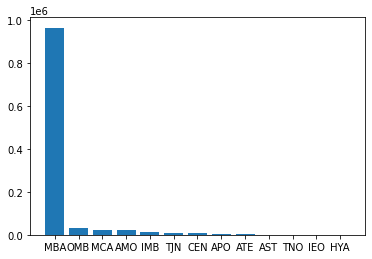

In [ ]:
plt.bar(datas['class'].unique(), val)

불균형 데이터.

클래스 간 샘플 차이가 너무 심하다. 
데이터는 클래스별 최대 수를 제한하고
오버샘플링하여 차이를 줄이려고 한다

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

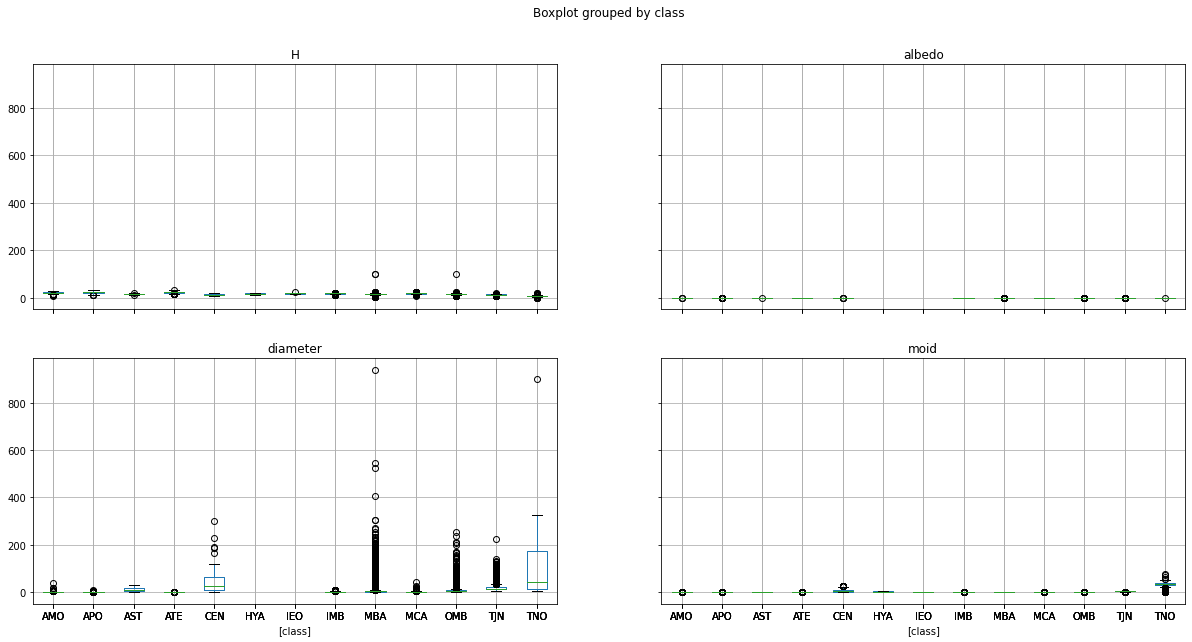

In [ ]:
datas[['H', 'moid', 'albedo', 'diameter', 'class']].boxplot(by='class', figsize=(20,10))

plt.show()
# class에 따른...

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

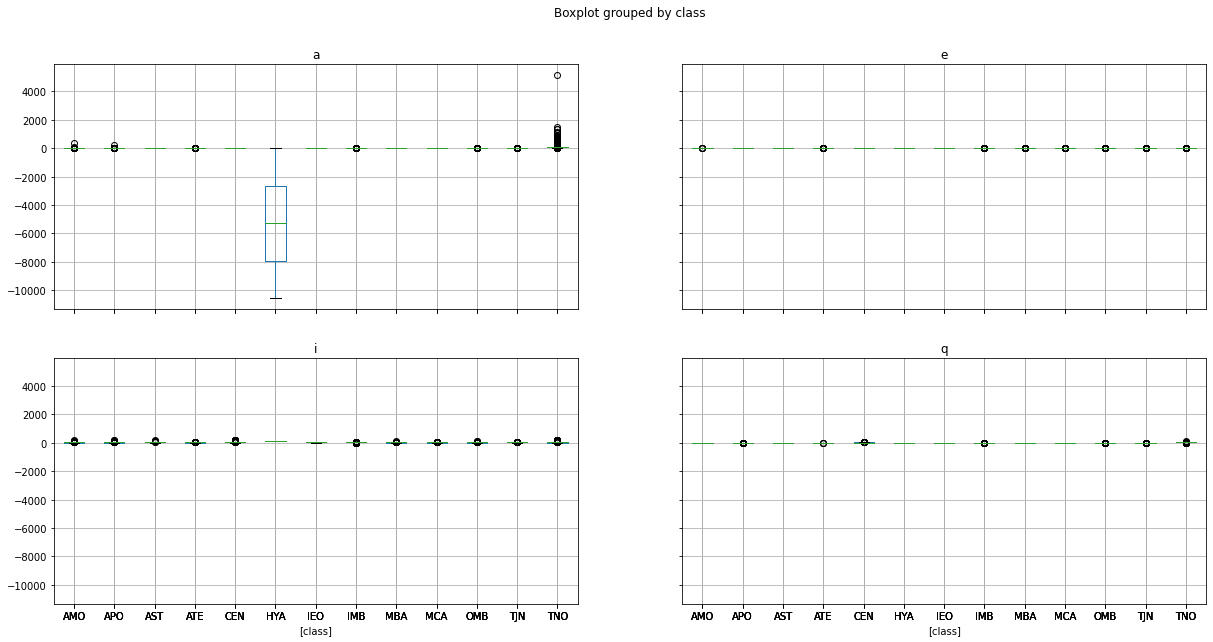

In [ ]:
datas[['e', 'a', 'q', 'i', 'class']].boxplot(by='class', figsize=(20,10))

plt.show()
# class에 따른...

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

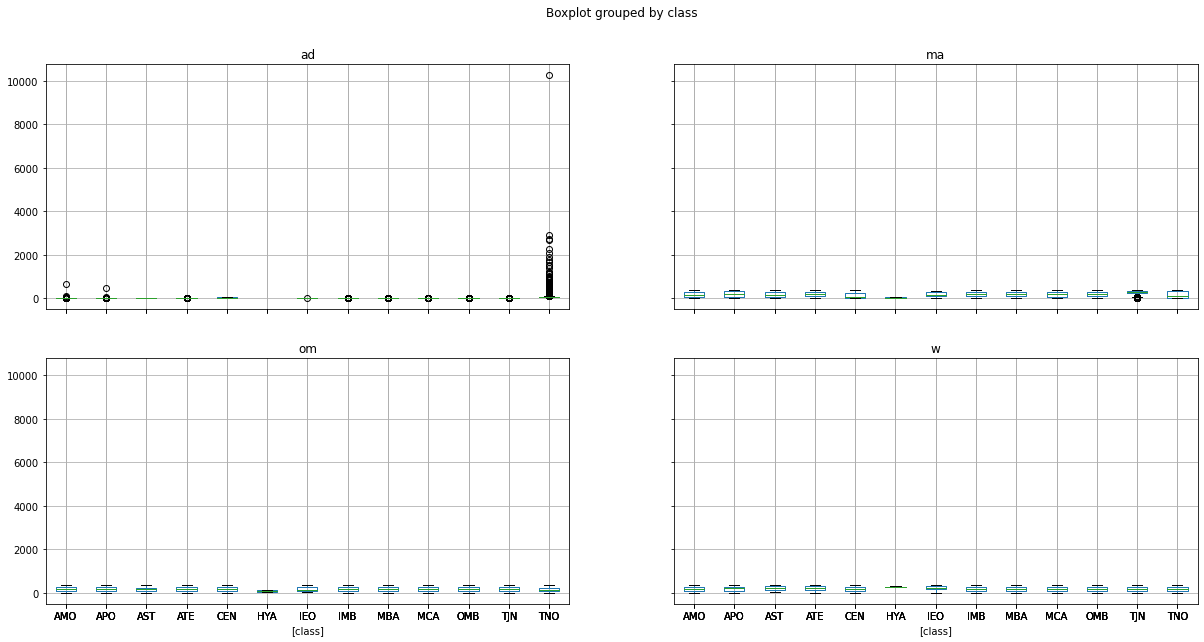

In [ ]:
datas[['om', 'w', 'ma', 'ad', 'class']].boxplot(by='class', figsize=(20,10))

plt.show()
# class에 따른...

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


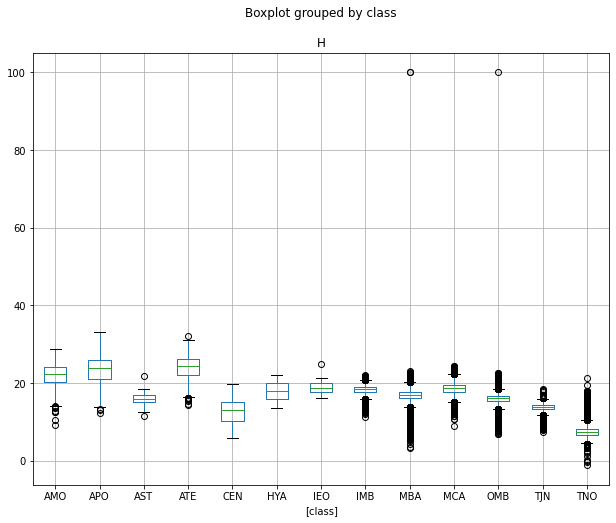

In [ ]:
datas[['H', 'class']].boxplot(by='class', figsize=(10,8))

plt.show()
# class에 따른...

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


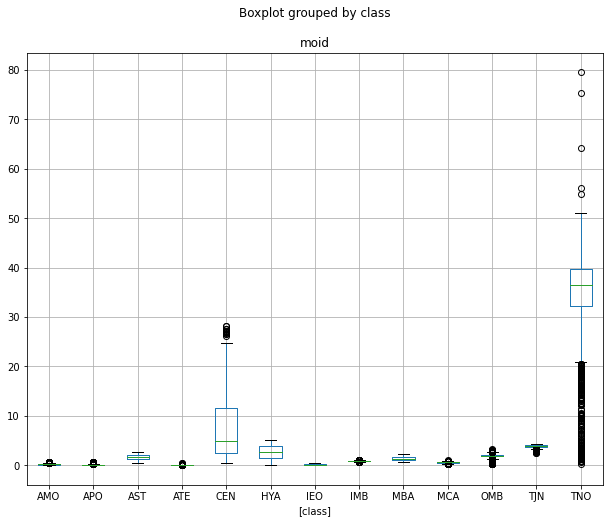

In [ ]:
datas[['moid', 'class']].boxplot(by='class', figsize=(10,8))

plt.show()
# class에 따른...

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


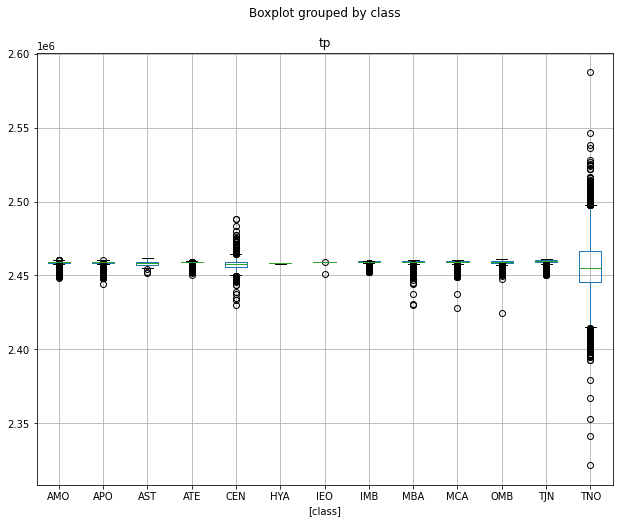

In [ ]:
datas[['tp', 'class']].boxplot(by='class', figsize=(10,8))

plt.show()
# class에 따른...

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


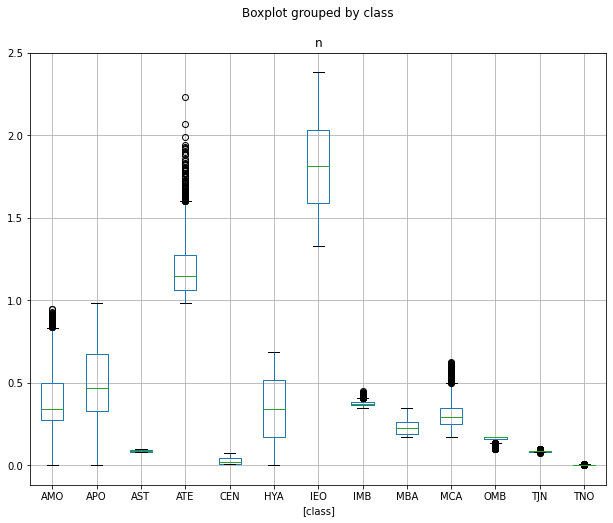

In [ ]:
datas[['n', 'class']].boxplot(by='class', figsize=(10,8))

plt.show()
# class에 따른...

In [ ]:
datas[['diameter', 'class']].boxplot(by='class', figsize=(10,8))

plt.show()
# class에 따른...

In [ ]:
X = datas

X.isnull().sum()

name        1057436
neo               2
pha           10615
H              3986
diameter     939620
albedo       940771
rot_per     1047042
spec_B      1077953
e                 0
a                 0
q                 0
i                 0
om                0
w                 0
ma                1
ad                2
n                 0
tp                0
per               2
moid          10615
class             0
dtype: int64

In [ ]:
X = datas.drop(['name', 'diameter', 'albedo', 'rot_per', 'spec_B'], axis=1)
X = X.dropna(subset=['pha', 'neo', 'moid', 'H', 'ma'])
y = X['class']

X = X.drop(['class'], axis=1)

print(X.shape)
print(y.shape)

# 특성 5개 제거 + 타겟값 분리

(1065017, 15)
(1065017,)


In [ ]:
X.isnull().sum()

#결측치 모두 제거함.

neo     0
pha     0
H       0
e       0
a       0
q       0
i       0
om      0
w       0
ma      0
ad      0
n       0
tp      0
per     0
moid    0
dtype: int64

In [ ]:
print(y.value_counts())

# 12개의 클래스로 바뀜
# 클래스 하나 결측치로 인해서 제거됨

MBA    951083
OMB     31525
IMB     22707
MCA     19971
APO     14308
TJN      9835
AMO      9410
TNO      3562
ATE      1979
CEN       547
AST        67
IEO        23
Name: class, dtype: int64

아직 불균형이 심함. 

In [ ]:
mask = np.zeros(y.shape, dtype=np.bool)

for t in np.unique(y):
    mask[np.where(y==t)[0][:5000]] =1
#np.where로 찾으면 arr [0] 에 그 결과가 들어옴
    
X_res = X[mask]
y_res = y[mask]

In [ ]:
print(X_res.shape)
print(y_res.shape)

(41178, 15)
(41178,)


In [ ]:
print(y_res.value_counts())

TJN    5000
AMO    5000
MBA    5000
APO    5000
OMB    5000
MCA    5000
IMB    5000
TNO    3562
ATE    1979
CEN     547
AST      67
IEO      23
Name: class, dtype: int64


<BarContainer object of 12 artists>

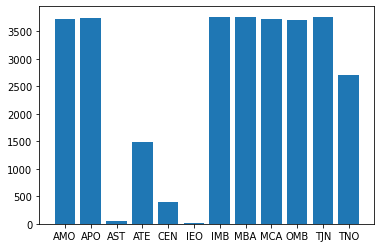

In [ ]:
unique, counts = np.unique(y_train, return_counts=True)
plt.bar(unique, counts)

In [ ]:
X_res.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41178 entries, 0 to 1079607
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   neo     41178 non-null  object 
 1   pha     41178 non-null  object 
 2   H       41178 non-null  float64
 3   e       41178 non-null  float64
 4   a       41178 non-null  float64
 5   q       41178 non-null  float64
 6   i       41178 non-null  float64
 7   om      41178 non-null  float64
 8   w       41178 non-null  float64
 9   ma      41178 non-null  float64
 10  ad      41178 non-null  float64
 11  n       41178 non-null  float64
 12  tp      41178 non-null  float64
 13  per     41178 non-null  float64
 14  moid    41178 non-null  float64
dtypes: float64(13), object(2)
memory usage: 5.0+ MB


In [ ]:
X_dum = pd.get_dummies(X_res)
X_dum

,H,e,a,q,i,om,w,ma,ad,n,tp,per,moid,neo_N,neo_Y,pha_N,pha_Y
0,3.530,0.078168,2.766089,2.549868,10.587899,80.272358,73.724889,205.545416,2.982310,0.214242,2.459921e+06,1680.341973,1.585370,1,0,1,0
1,4.210,0.229750,2.774382,2.136967,34.854459,172.965884,310.288113,187.586351,3.411796,0.213282,2.460009e+06,1687.903980,1.234870,1,0,1,0
2,5.260,0.256988,2.668020,1.982370,12.991482,169.853044,248.032767,170.711246,3.353669,0.226162,2.458446e+06,1591.776184,1.033160,1,0,1,0
3,3.290,0.088425,2.362030,2.153168,7.141653,103.808335,150.922482,258.567830,2.570893,0.271504,2.459574e+06,1325.948229,1.139330,1,0,1,0
4,6.990,0.190788,2.573621,2.082605,5.367534,141.571702,358.625009,65.612382,3.064636,0.238719,2.458926e+06,1508.048333,1.095630,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1079567,28.309,0.128398,0.943654,0.822491,10.320526,207.277225,229.248303,348.608272,1.064817,1.075189,2.459211e+06,334.824740,0.007234,0,1,1,0
1079579,27.885,0.103804,0.951802,0.853002,11.723774,208.001306,138.076795,100.668009,1.050603,1.061412,2.459106e+06,339.170918,0.013803,0,1,1,0
1079580,27.398,0.267188,0.909140,0.666229,13.572500,30.866040,311.853215,112.754755,1.152052,1.136993,2.459101e+06,316.624698,0.014253,0,1,1,0
1079603,26.630,0.287394,0.931892,0.664072,6.630602,42.946496,52.218532,307.411038,1.199713,1.095609,2.459248e+06,328.584368,0.011039,0,1,1,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_dum, y_res, random_state=0, stratify=y_res)

print(X_train.shape)
print(X_test.shape)

(30883, 17)
(10295, 17)


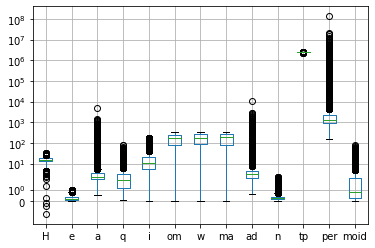

In [ ]:
X_res.boxplot()
plt.yscale('symlog')

In [ ]:
y_train.value_counts()

AMO    3750
APO    3750
OMB    3750
TJN    3750
MCA    3750
IMB    3750
MBA    3750
TNO    2672
ATE    1484
CEN     410
AST      50
IEO      17
Name: class, dtype: int64

In [ ]:
y_test.value_counts()

TJN    1250
MCA    1250
IMB    1250
MBA    1250
AMO    1250
APO    1250
OMB    1250
TNO     890
ATE     495
CEN     137
AST      17
IEO       6
Name: class, dtype: int64

In [ ]:
sampling_dict = {
    'ATE' : 2000,
    'IEO' : 2000,
    'AST' : 2000,
    'CEN' : 2000
}

smote = SMOTE(random_state=0, sampling_strategy=sampling_dict)
# 2000개가 넘지 않는 세 클래스만 대상으로 오버샘플링 진행

X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# smote 오버샘플링


print(X_train_smote.shape)

print(y_train.value_counts())
print(pd.DataFrame(y_train_smote).value_counts())


(36922, 17)
AMO    3750
APO    3750
OMB    3750
TJN    3750
MCA    3750
IMB    3750
MBA    3750
TNO    2672
ATE    1484
CEN     410
AST      50
IEO      17
Name: class, dtype: int64
TJN    3750
OMB    3750
MCA    3750
MBA    3750
IMB    3750
APO    3750
AMO    3750
TNO    2672
IEO    2000
CEN    2000
ATE    2000
AST    2000
dtype: int64


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

<BarContainer object of 12 artists>

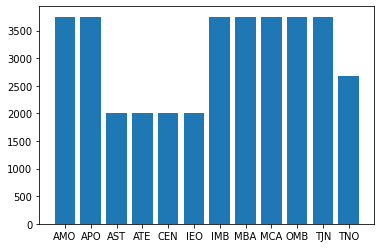

In [ ]:
unique, counts = np.unique(y_train_smote, return_counts=True)
plt.bar(unique, counts)

오버 샘플링 결과 최소 1000개로 데이터 샘플 수를 맞춤

In [ ]:
# 스케일링

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_smote_scaled = scaler.fit_transform(X_train_smote)
X_test_smote_scaled = scaler.transform(X_test)

In [ ]:
svm = SVC(random_state=0).fit(X_train_scaled, y_train)
print(svm.score(X_test_scaled, y_test))

0.9639630888780961


In [ ]:
print(confusion_matrix(y_test, svm.predict(X_test_scaled)))

[[1201   48    0    0    0    0    0    0    0    0    0    1]
 [  79 1157    0   14    0    0    0    0    0    0    0    0]
 [   0    0    0    0   14    0    0    0    1    2    0    0]
 [   0    5    0  490    0    0    0    0    0    0    0    0]
 [   0    0    0    0  125    0    0    0    0    0    6    6]
 [   0    0    0    6    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0 1247    1    2    0    0    0]
 [   0    0    0    0    0    0    0 1225    6   19    0    0]
 [   0    0    0    0    0    0   90    6 1154    0    0    0]
 [   0    0    0    0    2    0    0   51    6 1191    0    0]
 [   0    0    0    0    0    0    0    0    0    1 1249    0]
 [   0    0    0    0    5    0    0    0    0    0    0  885]]


In [ ]:
print(classification_report(y_test, svm.predict(X_test_scaled)))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         AMO       0.94      0.96      0.95      1250
         APO       0.96      0.93      0.94      1250
         AST       0.00      0.00      0.00        17
         ATE       0.96      0.99      0.98       495
         CEN       0.86      0.91      0.88       137
         IEO       0.00      0.00      0.00         6
         IMB       0.93      1.00      0.96      1250
         MBA       0.95      0.98      0.97      1250
         MCA       0.99      0.92      0.95      1250
         OMB       0.98      0.95      0.97      1250
         TJN       1.00      1.00      1.00      1250
         TNO       0.99      0.99      0.99       890

    accuracy                           0.96     10295
   macro avg       0.80      0.80      0.80     10295
weighted avg       0.96      0.96      0.96     10295



In [ ]:
svm_smote = SVC(random_state=0).fit(X_train_smote_scaled, y_train_smote)
print(svm_smote.score(X_test_smote_scaled, y_test))

0.9549295774647887


In [ ]:
print(confusion_matrix(y_test, svm_smote.predict(X_test_smote_scaled)))

[[1193   57    0    0    0    0    0    0    0    0    0    0]
 [ 116 1113    0   21    0    0    0    0    0    0    0    0]
 [   0    0   17    0    0    0    0    0    0    0    0    0]
 [   0    6    0  487    0    2    0    0    0    0    0    0]
 [   0    0   19    0  114    0    0    0    0    0    2    2]
 [   0    0    0    4    0    2    0    0    0    0    0    0]
 [   0    0    0    0    0    0 1247    1    2    0    0    0]
 [   0    0    0    0    0    0    1 1226    7   16    0    0]
 [   0    0    0    0    0    0  105    7 1138    0    0    0]
 [   0    0    6    0    0    0    0   69    5 1170    0    0]
 [   0    0    0    0    0    0    0    0    0    2 1248    0]
 [   0    0    0    0   14    0    0    0    0    0    0  876]]


In [ ]:
print(classification_report(y_test, svm_smote.predict(X_test_smote_scaled)))

              precision    recall  f1-score   support

         AMO       0.91      0.95      0.93      1250
         APO       0.95      0.89      0.92      1250
         AST       0.40      1.00      0.58        17
         ATE       0.95      0.98      0.97       495
         CEN       0.89      0.83      0.86       137
         IEO       0.50      0.33      0.40         6
         IMB       0.92      1.00      0.96      1250
         MBA       0.94      0.98      0.96      1250
         MCA       0.99      0.91      0.95      1250
         OMB       0.98      0.94      0.96      1250
         TJN       1.00      1.00      1.00      1250
         TNO       1.00      0.98      0.99       890

    accuracy                           0.95     10295
   macro avg       0.87      0.90      0.87     10295
weighted avg       0.96      0.95      0.96     10295



In [ ]:
np.unique(y_test)

array(['AMO', 'APO', 'AST', 'ATE', 'CEN', 'IEO', 'IMB', 'MBA', 'MCA',
       'OMB', 'TJN', 'TNO'], dtype=object)

In [ ]:
import warnings
from sklearn.exceptions import DataConversionWarning
with warnings.catch_warnings():
    warnings.simplefilter("ignore")

In [ ]:
pipe = make_pipeline(
    SMOTE(random_state=0, sampling_strategy=sampling_dict),
    StandardScaler(),
    SVC(random_state=0)
)

param_grid = {
              'svc__C' : [0.001, 0.01, 0.1, 1, 10,100],
             'svc__gamma': [0.001, 0.01, 0.1, 0.3],
             }

            
grid_search_svc = GridSearchCV(pipe, param_grid, cv=5)

In [ ]:
grid_search_svc.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('smote',
                                        SMOTE(k_neighbors=5, kind='deprecated',
                                              m_neighbors='deprecated',
                                              n_jobs=1, out_step='deprecated',
                                              random_state=0, ratio=None,
                                              sampling_strategy={'AST': 2000,
                                                                 'ATE': 2000,
                                                                 'CEN': 2000,
                                                                 'IEO': 2000},
                                              svm_estimator='deprecated')),
                                       ('standardscaler',
                                        StandardScaler(copy=True,
                                                    

(4, 6)


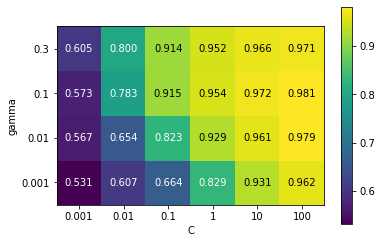

In [ ]:
scores = grid_search_svc.cv_results_['mean_test_score'].reshape(-1,4).T

print(scores.shape)
heatmap = mglearn.tools.heatmap(
    scores, xlabel="C", cmap='viridis', fmt='%.3f',
    ylabel="gamma",
    xticklabels=param_grid['svc__C'],
    yticklabels=param_grid['svc__gamma']
)
 
plt.colorbar(heatmap)


In [ ]:

print("테스트 세트 점수 : ", grid_search_svc.score(X_test, y_test))
print("최적 매개변수 ", grid_search_svc.best_params_)
print("최적 교차 검증 점수 ", grid_search_svc.best_score_)
print("최적 성능 모델 ", grid_search_svc.best_estimator_)


테스트 세트 점수 :  0.9850412821758135
최적 매개변수  {'svc__C': 100, 'svc__gamma': 0.1}
최적 교차 검증 점수  0.9809603212150038
최적 성능 모델  Pipeline(memory=None,
         steps=[('smote',
                 SMOTE(k_neighbors=5, kind='deprecated',
                       m_neighbors='deprecated', n_jobs=1,
                       out_step='deprecated', random_state=0, ratio=None,
                       sampling_strategy={'AST': 2000, 'ATE': 2000, 'CEN': 2000,
                                          'IEO': 2000},
                       svm_estimator='deprecated')),
                ('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=100, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma=0.1, kernel='rbf', max_iter=-1, probability=False,
                     random_state=0, shrinking=True, tol=0.001,
                     ve

In [ ]:
svm_grid = SVC(random_state=0, C=100, gamma=0.1).fit(X_train_smote_scaled, y_train_smote)

print(svm_grid.score(X_test_smote_scaled, y_test))

0.9850412821758135


In [ ]:
print(confusion_matrix(y_test, svm_grid.predict(X_test_smote_scaled)))

[[1223   27    0    0    0    0    0    0    0    0    0    0]
 [  32 1214    0    4    0    0    0    0    0    0    0    0]
 [   0    0   16    0    1    0    0    0    0    0    0    0]
 [   0    4    0  490    0    1    0    0    0    0    0    0]
 [   0    0    4    0  128    0    0    0    0    0    1    4]
 [   0    0    0    5    0    1    0    0    0    0    0    0]
 [   0    0    0    0    0    0 1238    0   12    0    0    0]
 [   0    0    0    0    0    0    0 1226    4   20    0    0]
 [   0    0    0    0    0    0    8    2 1240    0    0    0]
 [   0    0    3    0    0    0    0   12    3 1232    0    0]
 [   0    0    1    0    0    0    0    0    0    0 1249    0]
 [   0    0    0    0    6    0    0    0    0    0    0  884]]


In [ ]:
print(classification_report(y_test, svm_grid.predict(X_test_smote_scaled)))

              precision    recall  f1-score   support

         AMO       0.97      0.98      0.98      1250
         APO       0.98      0.97      0.97      1250
         AST       0.67      0.94      0.78        17
         ATE       0.98      0.99      0.99       495
         CEN       0.95      0.93      0.94       137
         IEO       0.50      0.17      0.25         6
         IMB       0.99      0.99      0.99      1250
         MBA       0.99      0.98      0.98      1250
         MCA       0.98      0.99      0.99      1250
         OMB       0.98      0.99      0.98      1250
         TJN       1.00      1.00      1.00      1250
         TNO       1.00      0.99      0.99       890

    accuracy                           0.99     10295
   macro avg       0.92      0.91      0.90     10295
weighted avg       0.99      0.99      0.98     10295



In [ ]:
rf_ori = RandomForestClassifier(random_state=0).fit(X_train, y_train)
print(rf_ori.score(X_test, y_test))
print(confusion_matrix(y_test, rf_ori.predict(X_test)))
print(classification_report(y_test, rf_ori.predict(X_test)))

0.9992229237493929
[[1250    0    0    0    0    0    0    0    0    0    0    0]
 [   0 1250    0    0    0    0    0    0    0    0    0    0]
 [   0    0   17    0    0    0    0    0    0    0    0    0]
 [   0    0    0  495    0    0    0    0    0    0    0    0]
 [   0    0    0    0  137    0    0    0    0    0    0    0]
 [   0    0    0    4    0    2    0    0    0    0    0    0]
 [   0    0    0    0    0    0 1250    0    0    0    0    0]
 [   0    0    0    0    0    0    0 1250    0    0    0    0]
 [   0    0    0    0    0    0    0    0 1250    0    0    0]
 [   0    0    1    0    0    0    0    0    0 1249    0    0]
 [   0    0    2    0    0    0    0    0    0    0 1248    0]
 [   0    0    0    0    1    0    0    0    0    0    0  889]]
              precision    recall  f1-score   support

         AMO       1.00      1.00      1.00      1250
         APO       1.00      1.00      1.00      1250
         AST       0.85      1.00      0.92        17
       

In [ ]:
rf = RandomForestClassifier(random_state=0).fit(X_train_smote, y_train_smote)
print(rf.score(X_test, y_test))

0.9995143273433705


In [ ]:
print(confusion_matrix(y_test, rf.predict(X_test)))

[[1250    0    0    0    0    0    0    0    0    0    0    0]
 [   0 1250    0    0    0    0    0    0    0    0    0    0]
 [   0    0   17    0    0    0    0    0    0    0    0    0]
 [   0    0    0  495    0    0    0    0    0    0    0    0]
 [   0    0    0    0  137    0    0    0    0    0    0    0]
 [   0    0    0    2    0    4    0    0    0    0    0    0]
 [   0    0    0    0    0    0 1250    0    0    0    0    0]
 [   0    0    0    0    0    0    0 1250    0    0    0    0]
 [   0    0    0    0    0    0    0    0 1250    0    0    0]
 [   0    0    1    0    0    0    0    0    0 1249    0    0]
 [   0    0    1    0    0    0    0    0    0    0 1249    0]
 [   0    0    0    0    1    0    0    0    0    0    0  889]]


In [ ]:

print(classification_report(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

         AMO       1.00      1.00      1.00      1250
         APO       1.00      1.00      1.00      1250
         AST       0.89      1.00      0.94        17
         ATE       1.00      1.00      1.00       495
         CEN       0.99      1.00      1.00       137
         IEO       1.00      0.67      0.80         6
         IMB       1.00      1.00      1.00      1250
         MBA       1.00      1.00      1.00      1250
         MCA       1.00      1.00      1.00      1250
         OMB       1.00      1.00      1.00      1250
         TJN       1.00      1.00      1.00      1250
         TNO       1.00      1.00      1.00       890

    accuracy                           1.00     10295
   macro avg       0.99      0.97      0.98     10295
weighted avg       1.00      1.00      1.00     10295



In [ ]:
# 중요도 함수
def plot_feature_importances(model, X, fea):
    n_features = X.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), fea)
    plt.xlabel("importance")
    plt.ylabel("feature")
    plt.ylim(-1, n_features)
    plt.xlim(0,1)
    plt.grid()

In [ ]:
X_dum.columns

Index(['H', 'e', 'a', 'q', 'i', 'om', 'w', 'ma', 'ad', 'n', 'tp', 'per',
       'moid', 'neo_N', 'neo_Y', 'pha_N', 'pha_Y'],
      dtype='object')

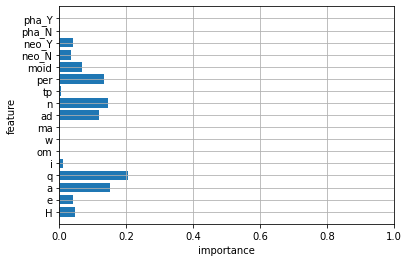

In [ ]:
features = X_dum.columns
plot_feature_importances(rf, X_test, features)

Text(0, 0.5, 'q')

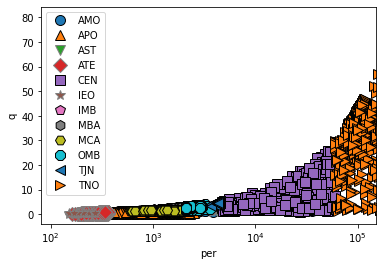

In [ ]:
mglearn.discrete_scatter(X_dum.per, X_dum.q, y_res)
plt.xscale('symlog')
plt.xlim(80,150000)
plt.legend()
plt.xlabel("per")
plt.ylabel("q")

In [ ]:
X_test.columns

Index(['H', 'e', 'a', 'q', 'i', 'om', 'w', 'ma', 'ad', 'n', 'tp', 'per',
       'moid', 'neo_N', 'neo_Y', 'pha_N', 'pha_Y'],
      dtype='object')

In [ ]:
xg = XGBClassifier(random_state=0).fit(X_train_smote, y_train_smote)
xg.score(np.array(X_test), y_test)

0.9995143273433705

In [ ]:
print(confusion_matrix(y_test, xg.predict(np.array(X_test))))


[[1250    0    0    0    0    0    0    0    0    0    0    0]
 [   0 1250    0    0    0    0    0    0    0    0    0    0]
 [   0    0   17    0    0    0    0    0    0    0    0    0]
 [   0    0    0  495    0    0    0    0    0    0    0    0]
 [   0    0    0    0  137    0    0    0    0    0    0    0]
 [   0    0    0    0    0    6    0    0    0    0    0    0]
 [   0    0    0    0    0    0 1250    0    0    0    0    0]
 [   0    0    0    0    0    0    0 1250    0    0    0    0]
 [   0    0    0    0    0    0    0    0 1250    0    0    0]
 [   0    0    2    0    0    0    0    0    0 1248    0    0]
 [   0    0    1    0    0    0    0    0    0    1 1248    0]
 [   0    0    0    0    1    0    0    0    0    0    0  889]]


In [ ]:
print(classification_report(y_test, xg.predict(np.array(X_test))))


              precision    recall  f1-score   support

         AMO       1.00      1.00      1.00      1250
         APO       1.00      1.00      1.00      1250
         AST       0.85      1.00      0.92        17
         ATE       1.00      1.00      1.00       495
         CEN       0.99      1.00      1.00       137
         IEO       1.00      1.00      1.00         6
         IMB       1.00      1.00      1.00      1250
         MBA       1.00      1.00      1.00      1250
         MCA       1.00      1.00      1.00      1250
         OMB       1.00      1.00      1.00      1250
         TJN       1.00      1.00      1.00      1250
         TNO       1.00      1.00      1.00       890

    accuracy                           1.00     10295
   macro avg       0.99      1.00      0.99     10295
weighted avg       1.00      1.00      1.00     10295



In [ ]:
mlp = MLPClassifier(random_state=0).fit(X_train_smote_scaled, y_train_smote)
print(mlp.score(X_test_smote_scaled, y_test))


0.9919378338999514


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
print(confusion_matrix(y_test, mlp.predict(X_test_smote_scaled)))

[[1229   20    0    0    1    0    0    0    0    0    0    0]
 [  10 1236    0    4    0    0    0    0    0    0    0    0]
 [   0    0   17    0    0    0    0    0    0    0    0    0]
 [   0    0    0  492    0    3    0    0    0    0    0    0]
 [   0    0    2    0  132    0    0    0    0    0    1    2]
 [   0    0    0    3    0    3    0    0    0    0    0    0]
 [   0    0    0    0    0    0 1246    0    4    0    0    0]
 [   0    0    0    0    0    0    1 1236    3   10    0    0]
 [   0    0    0    0    0    0    2    0 1248    0    0    0]
 [   0    0    3    0    0    0    0    9    2 1236    0    0]
 [   0    0    0    0    0    0    0    0    0    1 1249    0]
 [   0    0    0    0    2    0    0    0    0    0    0  888]]


In [ ]:
print(classification_report(y_test, mlp.predict(X_test_smote_scaled)))

              precision    recall  f1-score   support

         AMO       0.99      0.98      0.99      1250
         APO       0.98      0.99      0.99      1250
         AST       0.77      1.00      0.87        17
         ATE       0.99      0.99      0.99       495
         CEN       0.98      0.96      0.97       137
         IEO       0.50      0.50      0.50         6
         IMB       1.00      1.00      1.00      1250
         MBA       0.99      0.99      0.99      1250
         MCA       0.99      1.00      1.00      1250
         OMB       0.99      0.99      0.99      1250
         TJN       1.00      1.00      1.00      1250
         TNO       1.00      1.00      1.00       890

    accuracy                           0.99     10295
   macro avg       0.93      0.95      0.94     10295
weighted avg       0.99      0.99      0.99     10295



In [ ]:
mlp_ori = MLPClassifier(random_state=0).fit(X_train_scaled, y_train)
print(mlp_ori.score(X_test_scaled, y_test))


0.992326372025255


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
print(confusion_matrix(y_test, mlp_ori.predict(X_test_scaled)))

[[1232   15    0    0    3    0    0    0    0    0    0    0]
 [  10 1236    0    4    0    0    0    0    0    0    0    0]
 [   0    0   17    0    0    0    0    0    0    0    0    0]
 [   0    1    0  494    0    0    0    0    0    0    0    0]
 [   0    0    2    0  128    0    0    0    0    0    1    6]
 [   0    0    0    5    0    1    0    0    0    0    0    0]
 [   0    0    0    0    0    0 1242    0    8    0    0    0]
 [   0    0    0    0    0    0    0 1239    2    9    0    0]
 [   0    0    0    0    0    0    0    0 1250    0    0    0]
 [   0    0    3    0    0    0    0    6    2 1239    0    0]
 [   0    0    0    0    0    0    0    0    0    1 1249    0]
 [   0    0    0    0    1    0    0    0    0    0    0  889]]


In [ ]:
print(classification_report(y_test, mlp_ori.predict(X_test_scaled)))

              precision    recall  f1-score   support

         AMO       0.99      0.99      0.99      1250
         APO       0.99      0.99      0.99      1250
         AST       0.77      1.00      0.87        17
         ATE       0.98      1.00      0.99       495
         CEN       0.97      0.93      0.95       137
         IEO       1.00      0.17      0.29         6
         IMB       1.00      0.99      1.00      1250
         MBA       1.00      0.99      0.99      1250
         MCA       0.99      1.00      1.00      1250
         OMB       0.99      0.99      0.99      1250
         TJN       1.00      1.00      1.00      1250
         TNO       0.99      1.00      1.00       890

    accuracy                           0.99     10295
   macro avg       0.97      0.92      0.92     10295
weighted avg       0.99      0.99      0.99     10295



In [ ]:
mlp_10 = MLPClassifier(hidden_layer_sizes=(10,10), random_state=0).fit(X_train_smote_scaled, y_train_smote)
print(mlp_10.score(X_test_smote_scaled, y_test))

0.9920349684312774


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
print(confusion_matrix(y_test, mlp_10.predict(X_test_smote_scaled)))

[[1223   26    0    0    0    0    0    0    0    0    0    1]
 [   2 1245    0    3    0    0    0    0    0    0    0    0]
 [   0    0   17    0    0    0    0    0    0    0    0    0]
 [   0    1    0  492    0    2    0    0    0    0    0    0]
 [   0    0    3    0  132    0    0    0    0    0    1    1]
 [   0    0    0    1    0    5    0    0    0    0    0    0]
 [   0    0    0    0    0    0 1248    0    2    0    0    0]
 [   0    0    0    0    0    0    0 1222    2   26    0    0]
 [   0    0    0    0    0    0    2    0 1248    0    0    0]
 [   0    0    3    0    0    0    0    0    2 1245    0    0]
 [   0    0    0    0    0    0    0    0    0    1 1249    0]
 [   0    0    0    0    3    0    0    0    0    0    0  887]]


In [ ]:
print(classification_report(y_test, mlp_10.predict(X_test_smote_scaled)))

              precision    recall  f1-score   support

         AMO       1.00      0.98      0.99      1250
         APO       0.98      1.00      0.99      1250
         AST       0.74      1.00      0.85        17
         ATE       0.99      0.99      0.99       495
         CEN       0.98      0.96      0.97       137
         IEO       0.71      0.83      0.77         6
         IMB       1.00      1.00      1.00      1250
         MBA       1.00      0.98      0.99      1250
         MCA       1.00      1.00      1.00      1250
         OMB       0.98      1.00      0.99      1250
         TJN       1.00      1.00      1.00      1250
         TNO       1.00      1.00      1.00       890

    accuracy                           0.99     10295
   macro avg       0.95      0.98      0.96     10295
weighted avg       0.99      0.99      0.99     10295



In [ ]:
lr = LogisticRegression( max_iter=3000).fit(X_train_smote_scaled, y_train_smote)

print(lr.score(X_test_smote_scaled, y_test))

0.9618261291889266


In [ ]:
print(confusion_matrix(y_test, lr.predict(X_test_smote_scaled)))

[[1211   38    0    0    0    0    0    1    0    0    0    0]
 [  66 1170    0   14    0    0    0    0    0    0    0    0]
 [   0    0   17    0    0    0    0    0    0    0    0    0]
 [   0    0    0  490    0    5    0    0    0    0    0    0]
 [   0    0   16    0  114    0    0    0    0    0    7    0]
 [   0    0    0    2    0    4    0    0    0    0    0    0]
 [   0    0    0    0    0    0 1231    8   11    0    0    0]
 [   0    0    0    0    0    0    0 1200    6   44    0    0]
 [   0    0    0    0    0    0   78   11 1161    0    0    0]
 [   0    0    9    0    0    0    0   52    3 1181    5    0]
 [   0    0    0    0    0    0    0    1    0    5 1244    0]
 [   0    0    0    0   11    0    0    0    0    0    0  879]]


In [ ]:
print(classification_report(y_test, lr.predict(X_test_smote_scaled)))

              precision    recall  f1-score   support

         AMO       0.95      0.97      0.96      1250
         APO       0.97      0.94      0.95      1250
         AST       0.40      1.00      0.58        17
         ATE       0.97      0.99      0.98       495
         CEN       0.91      0.83      0.87       137
         IEO       0.44      0.67      0.53         6
         IMB       0.94      0.98      0.96      1250
         MBA       0.94      0.96      0.95      1250
         MCA       0.98      0.93      0.96      1250
         OMB       0.96      0.94      0.95      1250
         TJN       0.99      1.00      0.99      1250
         TNO       1.00      0.99      0.99       890

    accuracy                           0.96     10295
   macro avg       0.87      0.93      0.89     10295
weighted avg       0.96      0.96      0.96     10295



(-5.0, 5.0)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text

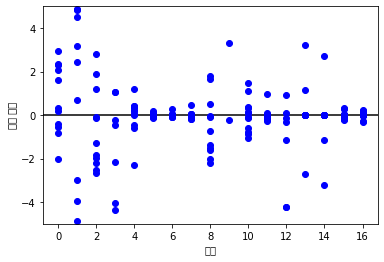

In [ ]:
plt.plot(lr.coef_.T, 'bo')
    
plt.xlabel("특성")
plt.ylabel("계수 크기")

xlimes = plt.xlim()
plt.hlines(0,xlimes[0], xlimes[1])
plt.xlim(xlimes)
plt.ylim(-5,5)


In [ ]:
lr = LogisticRegression( max_iter=3000).fit(X_train_scaled, y_train)

print(lr.score(X_test_scaled, y_test))

0.9678484701311316


In [ ]:
print(classification_report(y_test, lr.predict(X_test_scaled)))

              precision    recall  f1-score   support

         AMO       0.96      0.97      0.96      1250
         APO       0.97      0.95      0.96      1250
         AST       0.71      0.29      0.42        17
         ATE       0.98      1.00      0.99       495
         CEN       0.90      0.88      0.89       137
         IEO       1.00      0.17      0.29         6
         IMB       0.95      0.99      0.97      1250
         MBA       0.96      0.96      0.96      1250
         MCA       0.98      0.94      0.96      1250
         OMB       0.96      0.96      0.96      1250
         TJN       0.99      1.00      0.99      1250
         TNO       0.99      1.00      1.00       890

    accuracy                           0.97     10295
   macro avg       0.95      0.84      0.86     10295
weighted avg       0.97      0.97      0.97     10295



In [ ]:
poly = PolynomialFeatures()
X_train_poly = poly.fit_transform(X_train_smote_scaled)
X_test_poly = poly.transform(X_test_smote_scaled)

print(X_train_poly.shape)
print(y_train_smote.shape)


(36922, 171)
(36922,)


In [ ]:
from sklearn.decomposition import PCA


pca = PCA(n_components=100)
X_train_pca = pca.fit_transform(X_train_poly)
X_test_pca = pca.transform(X_test_poly)

In [ ]:
lr_poly = LogisticRegression( max_iter=3000).fit(X_train_pca, y_train_smote)

print(lr_poly.score(X_test_pca, y_test))
print(classification_report(y_test, lr_poly.predict(X_test_pca)))

0.9813501699854298
              precision    recall  f1-score   support

         AMO       0.98      0.99      0.99      1250
         APO       0.99      0.98      0.98      1250
         AST       0.55      0.94      0.70        17
         ATE       0.98      0.99      0.99       495
         CEN       0.95      0.88      0.91       137
         IEO       0.50      0.33      0.40         6
         IMB       0.98      0.98      0.98      1250
         MBA       0.97      0.97      0.97      1250
         MCA       0.98      0.98      0.98      1250
         OMB       0.97      0.97      0.97      1250
         TJN       1.00      1.00      1.00      1250
         TNO       0.99      0.99      0.99       890

    accuracy                           0.98     10295
   macro avg       0.90      0.92      0.91     10295
weighted avg       0.98      0.98      0.98     10295



In [ ]:
print(confusion_matrix(y_test, lr_poly.predict(X_test_pca)))

[[1236   12    0    0    0    0    0    1    1    0    0    0]
 [  19 1225    0    6    0    0    0    0    0    0    0    0]
 [   0    0   16    0    1    0    0    0    0    0    0    0]
 [   0    1    0  492    0    2    0    0    0    0    0    0]
 [   0    0    7    0  121    0    0    0    0    0    2    7]
 [   0    0    0    4    0    2    0    0    0    0    0    0]
 [   0    0    0    0    0    0 1229    7   13    1    0    0]
 [   0    0    0    0    0    0    0 1217    5   28    0    0]
 [   0    0    0    0    0    0   25    4 1221    0    0    0]
 [   0    0    6    0    0    0    0   26    3 1215    0    0]
 [   0    0    0    0    1    0    0    0    0    4 1245    0]
 [   0    0    0    0    5    0    0    0    0    0    1  884]]


In [ ]:
print(y_train.shape)

(30883,)


In [ ]:
pipe = make_pipeline(
    SMOTE(random_state=0, sampling_strategy=sampling_dict),
    PolynomialFeatures(include_bias=False),
    StandardScaler(),
    LogisticRegression(max_iter=5000)
)

param_grid = { 
              'logisticregression__C' : [0.01, 0.1, 1, 10,100],
             }

grid_search_lr = GridSearchCV(pipe, param_grid, cv=5)

In [ ]:
pipe.steps

[('smote',
  SMOTE(k_neighbors=5, kind='deprecated', m_neighbors='deprecated', n_jobs=1,
        out_step='deprecated', random_state=0, ratio=None,
        sampling_strategy={'AST': 1000, 'CEN': 1000, 'IEO': 1000},
        svm_estimator='deprecated')),
 ('polynomialfeatures',
  PolynomialFeatures(degree=2, include_bias=False, interaction_only=False,
                     order='C')),
 ('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)),
 ('logisticregression',
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                     intercept_scaling=1, l1_ratio=None, max_iter=5000,
                     multi_class='auto', n_jobs=None, penalty='l2',
                     random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                     warm_start=False))]

In [ ]:
grid_search_lr.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('smote',
                                        SMOTE(k_neighbors=5, kind='deprecated',
                                              m_neighbors='deprecated',
                                              n_jobs=1, out_step='deprecated',
                                              random_state=0, ratio=None,
                                              sampling_strategy={'AST': 1000,
                                                                 'CEN': 1000,
                                                                 'IEO': 1000},
                                              svm_estimator='deprecated')),
                                       ('polynomialfeatures',
                                        PolynomialFeatures(degree=2,
                                                           include_bias=Fals...
                                           

In [ ]:

print("테스트 세트 점수 : ", grid_search_lr.score(X_test, y_test))
print("최적 매개변수 ", grid_search_lr.best_params_)
print("최적 교차 검증 점수 ", grid_search_lr.best_score_)
print("최적 성능 모델 ", grid_search_lr.best_estimator_)


테스트 세트 점수 :  0.9941719281204469
최적 매개변수  {'logisticregression__C': 100}
최적 교차 검증 점수  0.9936210954309024
최적 성능 모델  Pipeline(memory=None,
         steps=[('smote',
                 SMOTE(k_neighbors=5, kind='deprecated',
                       m_neighbors='deprecated', n_jobs=1,
                       out_step='deprecated', random_state=0, ratio=None,
                       sampling_strategy={'AST': 1000, 'CEN': 1000,
                                          'IEO': 1000},
                       svm_estimator='deprecated')),
                ('polynomialfeatures',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('logisticregression',
                 LogisticRegression(C=100, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_sca

In [ ]:
lr_grid = LogisticRegression(C=100, max_iter=3000).fit(X_train_smote_scaled, y_train_smote)

print(lr_grid.score(X_test_smote_scaled, y_test))

0.98630403108305


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
print(confusion_matrix(y_test, lr_grid.predict(X_test_smote_scaled)))

[[1208   42    0    0    0    0    0    0    0    0    0    0]
 [  43 1215    0    3    0    0    0    0    0    0    0    0]
 [   0    0   18    0    1    0    0    0    0    1    1    0]
 [   0    0    0  482    0    2    0    0    0    0    0    0]
 [   0    0    4    0  127    0    0    0    0    0    5    2]
 [   0    0    0    1    0    4    0    0    0    0    0    0]
 [   0    0    0    0    0    0 1253    0    7    0    0    0]
 [   0    0    0    0    0    0    0 1176    0   36    0    0]
 [   0    0    6    0    0    0   38    1 1183    0    0    0]
 [   0    0    1    0    0    0    0   23    3 1198    0    0]
 [   0    0    0    0    0    0    0    0    0    0 1274    0]
 [   0    0    0    0    3    0    0    0    0    0    0  934]]


In [ ]:
print(classification_report(y_test, lr_grid.predict(X_test_smote_scaled)))

              precision    recall  f1-score   support

         AMO       0.97      0.97      0.97      1250
         APO       0.97      0.96      0.97      1261
         AST       0.62      0.86      0.72        21
         ATE       0.99      1.00      0.99       484
         CEN       0.97      0.92      0.94       138
         IEO       0.67      0.80      0.73         5
         IMB       0.97      0.99      0.98      1260
         MBA       0.98      0.97      0.98      1212
         MCA       0.99      0.96      0.98      1228
         OMB       0.97      0.98      0.97      1225
         TJN       1.00      1.00      1.00      1274
         TNO       1.00      1.00      1.00       937

    accuracy                           0.98     10295
   macro avg       0.92      0.95      0.94     10295
weighted avg       0.98      0.98      0.98     10295



(5, 1)


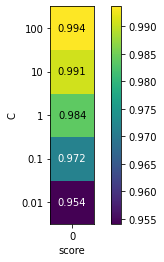

In [ ]:
scores = grid_search_lr.cv_results_['mean_test_score'].reshape(-1,5).T

print(scores.shape)
heatmap = mglearn.tools.heatmap(
    scores, xlabel="score", cmap='viridis', fmt='%.3f',
    ylabel="C",
    yticklabels=param_grid['logisticregression__C'],
    xticklabels={0}
)
 
plt.colorbar(heatmap)


(-5.0, 5.0)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text

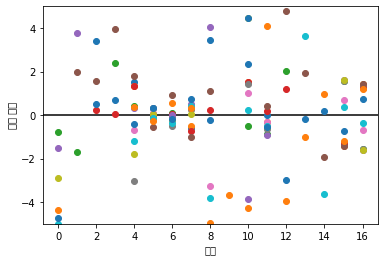

In [ ]:
plt.plot(lr_grid.coef_.T, 'o')
    
plt.xlabel("특성")
plt.ylabel("계수 크기")

xlimes = plt.xlim()
plt.hlines(0,xlimes[0], xlimes[1])
plt.xlim(xlimes)
plt.ylim(-5,5)
